# A Motivating Example for Case Study

In [1]:
import os, sys, argparse
from time import time
import numpy as np
np.random.seed(2023)
sys.path.append('../pshap')
from shap import ShapEngine
import utils, data

## Load data

- We use the Phoneme dataset and suppose 10% of data points in the training dataset is mislabeled.
- A function data.load_data will load the train, val, and test datasets as well as a noisy index.

In [2]:
problem='classification'
dataset='phoneme'
dargs={'n_data_to_be_valued': 200, 'n_val': 200, 'n_test': 1000}

In [3]:
# Load dataset
(X, y), (X_val, y_val), (X_test, y_test), noisy_index=data.load_data(problem, dataset, **dargs)

print('-'*30)
print(f'Train X: {X.shape}')
print(f'Val X: {X_val.shape}')
print(f'Test X: {X_test.shape}')
print('-'*30)
print(np.bincount(y))

--------------------------------------------------
Phoneme
--------------------------------------------------
------------------------------
Train X: (200, 5)
Val X: (200, 5)
Test X: (1000, 5)
------------------------------
[100 100]


## Try Accuracy as the Utility Function

In [4]:
model_family='logistic'
metric='accuracy'
GR_threshold=1.05
weights_list=[(1, 16), (1, 4), (1,1), (4,1), (16, 1)]

In [5]:
# Evaluate values
shap_engine=ShapEngine(X=X, y=y, X_val=X_val, y_val=y_val, 
                       problem=problem, model_family=model_family, 
                       metric=metric, GR_threshold=GR_threshold, max_iters=1)
%time shap_engine.run(weights_list=weights_list)

Source is initialized. A unit of sample is one data point
Start: Marginal Contribution Calculation!


100%|██████████| 10/10 [03:10<00:00, 19.07s/it]

Done: Marginal Contribution Calculation! 


CPU times: total: 2min 50s
Wall time: 3min 10s


In [6]:
MC_mat=shap_engine.MC_obs_card_mat/(shap_engine.MC_count_obs_card_mat+1e-16)
print(f'Shape of MC_mat : {MC_mat.shape}')
print(f'First 12 marginal contributions of the first sample:\n {np.array(MC_mat[0])[:12]}')

Shape of MC_mat : (200, 200)
First 12 marginal contributions of the first sample:
 [ 0.          0.00777778 -0.045      -0.01375    -0.04625    -0.08625
 -0.07375    -0.05833333 -0.065      -0.04       -0.0875     -0.05      ]


In [7]:
act_MC_mat=shap_engine.act_MC_obs_card_mat/(shap_engine.act_MC_count_obs_card_mat+1e-16)
print(f'Shape of MC_mat : {MC_mat.shape}')
print(f'First 12 marginal contributions of the first sample:\n {np.array(MC_mat[0])[:12]}')

Shape of MC_mat : (200, 200)
First 12 marginal contributions of the first sample:
 [ 0.          0.00777778 -0.045      -0.01375    -0.04625    -0.08625
 -0.07375    -0.05833333 -0.065      -0.04       -0.0875     -0.05      ]


## Marginal contributions for clean and noisy samples

Text(0, 0.5, 'Marginal Contributions')

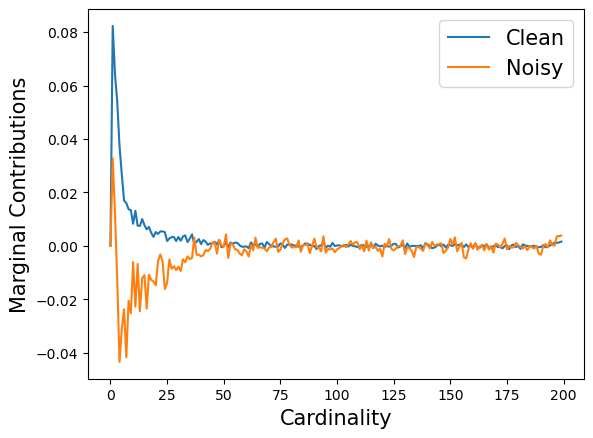

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
clean_index=[i for i in range(act_MC_mat.shape[0]) if i not in noisy_index]
plt.plot(np.arange(act_MC_mat.shape[0]), np.mean(act_MC_mat[clean_index], axis=0), label='Clean')
plt.plot(np.arange(act_MC_mat.shape[0]), np.mean(act_MC_mat[noisy_index], axis=0), label='Noisy')
plt.legend(fontsize=15)
plt.xlabel('Cardinality', fontsize=15)
plt.ylabel('Marginal Contributions', fontsize=15)

We find that contribution margins quickly become indistinguishable.

## Replace Accuracy with Raw Probability

In [9]:
model_family='logistic'
metric='likelihood' # use raw probability
GR_threshold=1.05
weights_list=[(1, 16), (1, 4), (1,1), (4,1), (16, 1)]

In [10]:
# Evaluate values
shap_engine=ShapEngine(X=X, y=y, X_val=X_val, y_val=y_val,
                       problem=problem, model_family=model_family,
                       metric=metric, GR_threshold=GR_threshold, max_iters=1)
%time shap_engine.run(weights_list=weights_list)

Source is initialized. A unit of sample is one data point
Start: Marginal Contribution Calculation!


100%|██████████| 10/10 [03:04<00:00, 18.49s/it]

Done: Marginal Contribution Calculation! 


CPU times: total: 2min 46s
Wall time: 3min 5s


In [11]:
MC_mat=shap_engine.MC_obs_card_mat/(shap_engine.MC_count_obs_card_mat+1e-16)
print(f'Shape of MC_mat : {MC_mat.shape}')
print(f'First 12 marginal contributions of the first sample:\n {np.array(MC_mat[0])[:12]}')

Shape of MC_mat : (200, 200)
First 12 marginal contributions of the first sample:
 [ 0.         -0.0035291   0.0003467  -0.00448716 -0.0042967  -0.00458349
 -0.00476784 -0.0044926  -0.00487484 -0.00491005 -0.0042415  -0.00437907]


In [12]:
act_MC_mat=shap_engine.act_MC_obs_card_mat/(shap_engine.act_MC_count_obs_card_mat+1e-16)
print(f'Shape of MC_mat : {MC_mat.shape}')
print(f'First 12 marginal contributions of the first sample:\n {np.array(MC_mat[0])[:12]}')

Shape of MC_mat : (200, 200)
First 12 marginal contributions of the first sample:
 [ 0.         -0.0035291   0.0003467  -0.00448716 -0.0042967  -0.00458349
 -0.00476784 -0.0044926  -0.00487484 -0.00491005 -0.0042415  -0.00437907]


## Marginal contributions for clean and noisy samples

Text(0, 0.5, 'Marginal Contributions')

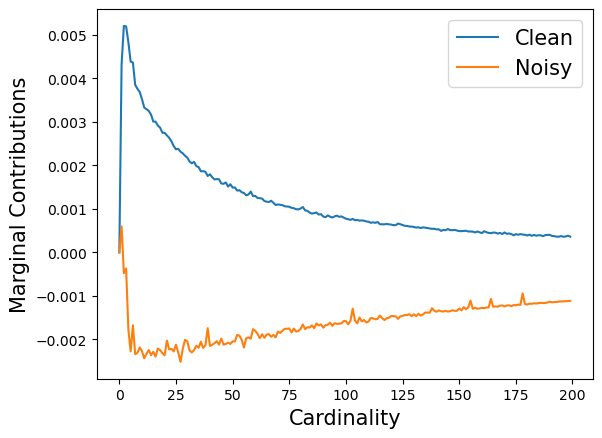

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
clean_index=[i for i in range(act_MC_mat.shape[0]) if i not in noisy_index]
plt.plot(np.arange(act_MC_mat.shape[0]), np.mean(act_MC_mat[clean_index], axis=0), label='Clean')
plt.plot(np.arange(act_MC_mat.shape[0]), np.mean(act_MC_mat[noisy_index], axis=0), label='Noisy')
plt.legend(fontsize=15)
plt.xlabel('Cardinality', fontsize=15)
plt.ylabel('Marginal Contributions', fontsize=15)

We find that using “raw probabilities” significantly improves the discrimination of marginal contributions, which aids in data valuation. Feel free to test other datasets :)